In [1]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


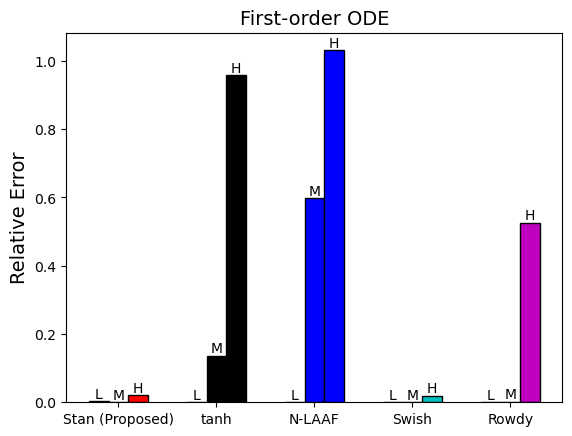

In [2]:
fig, ax = plt.subplots()
num_steps = 200
prob_name = "1D_FODE_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan (Proposed)','tanh','N-LAAF','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['./stan/','./tanh/','./atanh/','./swish/','./rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

stop = -5

tick_locs = np.zeros((5,))
for i in range(5):
    mean_test_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_loss =  dat['test_re_loss']
        
        mean_test_loss[j] = np.nanmean(test_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    locs = np.linspace(start,stop,3)
    
    tick_locs[i] = start+1
    bar = ax.bar(locs,mean_test_loss,width = 1.0,color = all_colors[i],edgecolor = "black")
    ax.bar_label(bar,labels = ['L','M','H'])
ax.set_xticks(tick_locs)
ax.set_xticklabels(all_labels,rotation = 0)
# # ax.set_ylim([0,1.1])
# ax.set_yscale('log')
ax.set_title('First-order ODE', fontsize=14)
ax.set_ylabel('Relative Error',fontsize=14,alpha = 1)

fig.savefig(prob_name+'re_bar.eps', format='eps', bbox_inches='tight')
fig.savefig(prob_name+'re_bar.pdf', format='pdf', bbox_inches='tight')